In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
from gensim import matutils, models
import scipy.sparse
import string
from collections import Counter
import pyLDAvis.gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

# Inception

In [2]:
Inception = pd.read_csv('Inception.csv')
Inception.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Inception.head()

date                                              tweet  \
0  2011-07-11 19:59:41              Who understands that Inception movie?   
1  2011-07-11 19:59:29  Inception in my pants #improvefilmtitlesbyaddi...   
2  2011-07-11 19:59:09      RT @ imNot_daFather #GreatHighMovie Inception   
3  2011-07-11 19:58:23                                never saw inception   
4  2011-07-11 19:57:45  @jck49erfan @Cornholio3000 was inception the o...   

  language                                hashtags         username  \
0       en                                      []  debbie_nthejets   
1       en  ['improvefilmtitlesbyaddinginmypants']       MercDeejay   
2       en                      ['greathighmovie']      Lejailatroi   
3       en                                      []           6tacey   
4       en                                      []       JHScramble   

                                                link  retweet  nlikes  \
0  https://twitter.com/debbie_nthejets/status/905...    False       0   
1  https://twitter.com/MercDeejay/status/90570938...    False       0   
2  https://twitter.com/Lejailatroi/status/9057085...    False       0   
3  https://twitter.com/6tacey/status/905706630473...    False       0   
4  https://twitter.com/JHScramble/status/90570505...    False       0   

   nreplies  nretweets  retweet_date  vader_score  positive sentiment score  \
0         0          0           NaN       0.0000                     0.000   
1         0          0           NaN       0.0000                     0.000   
2         0          0           NaN       0.0000                     0.000   
3         0          1           NaN       0.0000                     0.000   
4         2          0           NaN       0.4215                     0.123   

   negative sentiment score  neutral sentiment score  compound sentiment score  
0                       0.0                    1.000                    0.0000  
1                       0.0                    1.000                    0.0000  
2                       0.0                    1.000                    0.0000  
3                       0.0                    1.000                    0.0000  
4                       0.0                    0.877                    0.4215

# Latent Dirichlet Allocation

In [7]:
# chooose the number of topics you think are in your corpus k = 5
#randomly assigns each word to a topic
#goes through every word and topic assignment in each document, looks at how often the topic occurs in the codument and 
#how often the word occurs in the topic
#go through mulitple iterations of this until the topics are interpretable 

In [8]:
# ^ gensim does this for you

In [9]:
# input: document-term matrix, number of topics, number of iterations
#output: top words in each topic

In [4]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in Inception['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

[['who', 'understands', 'that', 'inception', 'movie'], ['inception', 'in', 'my', 'pants', 'improvefilmtitlesbyaddinginmypants'], ['rt', 'imnot', 'dafather', 'greathighmovie', 'inception'], ['never', 'saw', 'inception'], ['jck49erfan', 'cornholio3000', 'was', 'inception', 'the', 'one', 'where', 'leo', 'is', 'a', 'patient', 'and', 'the', 'ending', 'was', 'spoiled', 'on', 'a', 'popular', 'sport', 's', 'blog'], ['creamadoir', 'inception', 'in', 'my', 'pants', 'lol'], ['esmeraldabaza', 'inception', 'jkjk', 'lol'], ['sleeping', 'in', 'the', 'backseat', 'of', 'a', 'van', 'while', 'it', 's', 'in', 'motion', 'inception'], ['watching', 'adjustment', 'bureau', 'inception', 'with', 'trilbys'], ['inception', 'inception', 'http', 'bit', 'ly', 'nalu29'], ['warriorgrrrl', 'since', 'i', 've', 'watched', 'inception', 'it', 'happens', 'to', 'me', 'all', 'the', 'time', 'brilliant', 'movie', 'but', 'a', 'total', 'mind', 'fuck'], ['improvefilmtitlesbyaddinginmypants', 'inception', 'i', 'my', 'pants'], ['wat

In [5]:
#creating a stop words list - these words don't add much value
from nltk.corpus import stopwords
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

tweets

['understands',
 'inception',
 'movie',
 'inception',
 'pants',
 'improvefilmtitlesbyaddinginmypants',
 'imnot',
 'dafather',
 'greathighmovie',
 'inception',
 'never',
 'saw',
 'inception',
 'jck49erfan',
 'cornholio3000',
 'inception',
 'one',
 'leo',
 'patient',
 'ending',
 'spoiled',
 'popular',
 'sport',
 'blog',
 'creamadoir',
 'inception',
 'pants',
 'lol',
 'esmeraldabaza',
 'inception',
 'jkjk',
 'lol',
 'sleeping',
 'backseat',
 'van',
 'motion',
 'inception',
 'watching',
 'adjustment',
 'bureau',
 'inception',
 'trilbys',
 'inception',
 'inception',
 'bit',
 'nalu29',
 'warriorgrrrl',
 'since',
 'watched',
 'inception',
 'happens',
 'time',
 'brilliant',
 'movie',
 'total',
 'mind',
 'fuck',
 'improvefilmtitlesbyaddinginmypants',
 'inception',
 'pants',
 'watchinq',
 'inception',
 'lenardo',
 '3',
 'like',
 'inception',
 'inception',
 'hmmm',
 'amaaazing',
 'concept',
 'movie',
 'really',
 'liked',
 'read',
 'word',
 'magazines',
 'deejaylunchbox',
 'dream',
 'djexodus',
 '

In [16]:
#document term matrix - tweet by word THIS ONE

In [17]:
#use stemmed words

In [9]:
# Stemming
from nltk.stem import PorterStemmer

In [10]:
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

[['understand', 'incept', 'movi'],
 ['incept', 'pant', 'improvefilmtitlesbyaddinginmyp'],
 ['imnot', 'dafath', 'greathighmovi', 'incept'],
 ['never', 'saw', 'incept'],
 ['jck49erfan',
  'cornholio3000',
  'incept',
  'one',
  'leo',
  'patient',
  'end',
  'spoil',
  'popular',
  'sport',
  'blog'],
 ['creamadoir', 'incept', 'pant', 'lol'],
 ['esmeraldabaza', 'incept', 'jkjk', 'lol'],
 ['sleep', 'backseat', 'van', 'motion', 'incept'],
 ['watch', 'adjust', 'bureau', 'incept', 'trilbi'],
 ['incept', 'incept', 'bit', 'nalu29'],
 ['warriorgrrrl',
  'sinc',
  'watch',
  'incept',
  'happen',
  'time',
  'brilliant',
  'movi',
  'total',
  'mind',
  'fuck'],
 ['improvefilmtitlesbyaddinginmyp', 'incept', 'pant'],
 ['watchinq', 'incept', 'lenardo', '3'],
 ['like', 'incept'],
 ['incept', 'hmmm', 'amaaaz', 'concept', 'movi', 'realli', 'like'],
 ['read',
  'word',
  'magazin',
  'deejaylunchbox',
  'dream',
  'djexodu',
  'incept',
  'dope',
  'movi'],
 ['incept', 'pant', 'improvefilmtitlesbyaddi

In [11]:
len(stemmed_tweets)

5100

In [12]:
Inception['stemmed'] = stemmed_tweets

stemmed_tweets_lst = []
for tweet in Inception['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

Inception['string_stemmed'] = stemmed_tweets_lst

Inception.head()

date                                              tweet  \
0  2011-07-11 19:59:41              Who understands that Inception movie?   
1  2011-07-11 19:59:29  Inception in my pants #improvefilmtitlesbyaddi...   
2  2011-07-11 19:59:09      RT @ imNot_daFather #GreatHighMovie Inception   
3  2011-07-11 19:58:23                                never saw inception   
4  2011-07-11 19:57:45  @jck49erfan @Cornholio3000 was inception the o...   

  language                                hashtags         username  \
0       en                                      []  debbie_nthejets   
1       en  ['improvefilmtitlesbyaddinginmypants']       MercDeejay   
2       en                      ['greathighmovie']      Lejailatroi   
3       en                                      []           6tacey   
4       en                                      []       JHScramble   

                                                link  retweet  nlikes  \
0  https://twitter.com/debbie_nthejets/status/905...    False       0   
1  https://twitter.com/MercDeejay/status/90570938...    False       0   
2  https://twitter.com/Lejailatroi/status/9057085...    False       0   
3  https://twitter.com/6tacey/status/905706630473...    False       0   
4  https://twitter.com/JHScramble/status/90570505...    False       0   

   nreplies  nretweets  retweet_date  vader_score  positive sentiment score  \
0         0          0           NaN       0.0000                     0.000   
1         0          0           NaN       0.0000                     0.000   
2         0          0           NaN       0.0000                     0.000   
3         0          1           NaN       0.0000                     0.000   
4         2          0           NaN       0.4215                     0.123   

   negative sentiment score  neutral sentiment score  \
0                       0.0                    1.000   
1                       0.0                    1.000   
2                       0.0                    1.000   
3                       0.0                    1.000   
4                       0.0                    0.877   

   compound sentiment score  \
0                    0.0000   
1                    0.0000   
2                    0.0000   
3                    0.0000   
4                    0.4215   

                                             stemmed  \
0                         [understand, incept, movi]   
1     [incept, pant, improvefilmtitlesbyaddinginmyp]   
2             [imnot, dafath, greathighmovi, incept]   
3                               [never, saw, incept]   
4  [jck49erfan, cornholio3000, incept, one, leo, ...   

                                      string_stemmed  
0                             understand incept movi  
1         incept pant improvefilmtitlesbyaddinginmyp  
2                  imnot dafath greathighmovi incept  
3                                   never saw incept  
4  jck49erfan cornholio3000 incept one leo patien...

The row numbers represent each tweet and the columns represent every stemmed word tweeted about inception.

In [14]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)

X = vec.fit_transform(Inception['string_stemmed'].tolist())

vec.get_feature_names()

['000',
 '00a',
 '00pm',
 '02',
 '03zutlg',
 '04gb',
 '07',
 '090',
 '0cdefc1',
 '0dizzl',
 '0ijnzn',
 '0jghi4tac5u',
 '0victoria',
 '10',
 '100',
 '1001',
 '100mb',
 '103pvgo7a',
 '1080p',
 '10naciousknight',
 '10thingsihatabouty',
 '10tym',
 '10yr',
 '11',
 '110xz61tc',
 '11303183',
 '119094463',
 '119203927',
 '119272484',
 '11th',
 '12',
 '1202',
 '123juanisher',
 '127',
 '12pm',
 '12th',
 '13',
 '1337olog',
 '13th',
 '13yr',
 '14',
 '146',
 '14gcjjvrv',
 '15',
 '15a',
 '16',
 '160l3l',
 '18t99kyeg',
 '19',
 '1972',
 '1976',
 '1978',
 '1990',
 '1997',
 '1999',
 '19th',
 '19vyp8qf3',
 '1b',
 '1ce',
 '1derri',
 '1djwvt',
 '1h',
 '1hour',
 '1l',
 '1mjg41',
 '1of',
 '1realmusicmak',
 '1st',
 '1w68gr',
 '20',
 '200',
 '2001',
 '2003',
 '2004',
 '2005',
 '2009',
 '2010',
 '2010director',
 '2010genr',
 '2011',
 '20min',
 '20th',
 '21',
 '2199154',
 '21st',
 '22',
 '23',
 '23066787',
 '23pyl',
 '24',
 '24034356',
 '25',
 '26',
 '27',
 '273',
 '27dadon',
 '28',
 '28min',
 '2am',
 '2arrows1p

In [15]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.shape

(5100, 6420)

https://www.youtube.com/watch?v=xvqsFTUsOmc&amp%3Bab_channel=PyOhio

https://radimrehurek.com/gensim/models/ldamodel.html

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Columns: 6420 entries, 000 to zzzzzzz
dtypes: int64(6420)
memory usage: 249.8 MB


In [18]:
df.head(15)

000  00a  00pm  02  03zutlg  04gb  07  090  0cdefc1  0dizzl  ...  \
0     0    0     0   0        0     0   0    0        0       0  ...   
1     0    0     0   0        0     0   0    0        0       0  ...   
2     0    0     0   0        0     0   0    0        0       0  ...   
3     0    0     0   0        0     0   0    0        0       0  ...   
4     0    0     0   0        0     0   0    0        0       0  ...   
5     0    0     0   0        0     0   0    0        0       0  ...   
6     0    0     0   0        0     0   0    0        0       0  ...   
7     0    0     0   0        0     0   0    0        0       0  ...   
8     0    0     0   0        0     0   0    0        0       0  ...   
9     0    0     0   0        0     0   0    0        0       0  ...   
10    0    0     0   0        0     0   0    0        0       0  ...   
11    0    0     0   0        0     0   0    0        0       0  ...   
12    0    0     0   0        0     0   0    0        0       0  ...   
13    0    0     0   0        0     0   0    0        0       0  ...   
14    0    0     0   0        0     0   0    0        0       0  ...   

    zooeyglass  zookeep  zoveel  zpdfj  zpxw4  zuckerberg  zumba  zvkyj  \
0            0        0       0      0      0           0      0      0   
1            0        0       0      0      0           0      0      0   
2            0        0       0      0      0           0      0      0   
3            0        0       0      0      0           0      0      0   
4            0        0       0      0      0           0      0      0   
5            0        0       0      0      0           0      0      0   
6            0        0       0      0      0           0      0      0   
7            0        0       0      0      0           0      0      0   
8            0        0       0      0      0           0      0      0   
9            0        0       0      0      0           0      0      0   
10           0        0       0      0      0           0      0      0   
11           0        0       0      0      0           0      0      0   
12           0        0       0      0      0           0      0      0   
13           0        0       0      0      0           0      0      0   
14           0        0       0      0      0           0      0      0   

    zw3yz  zzzzzzz  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0  
5       0        0  
6       0        0  
7       0        0  
8       0        0  
9       0        0  
10      0        0  
11      0        0  
12      0        0  
13      0        0  
14      0        0  

[15 rows x 6420 columns]

In [19]:
df.dtypes

000           int64
00a           int64
00pm          int64
02            int64
03zutlg       int64
              ...  
zuckerberg    int64
zumba         int64
zvkyj         int64
zw3yz         int64
zzzzzzz       int64
Length: 6420, dtype: object

In [20]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [21]:
corpus

In [22]:
sparse_counts

<5100x6420 sparse matrix of type '<class 'numpy.int64'>'
	with 30235 stored elements in Compressed Sparse Row format>

In [24]:
dictionary = corpora.Dictionary(Inception['stemmed'])
type(dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [25]:
corpus = [dictionary.doc2bow(d) for d in Inception['stemmed']]

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
len(dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6461

In [27]:
dictionary

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.102*"incept" + 0.011*"pant" + 0.010*"gonna" + 0.009*"rock" + 0.008*"dicaprio" + 0.007*"leonardo" + 0.007*"nw" + 0.006*"movi" + 0.005*"great" + 0.005*"ray"'),
 (1,
  '0.110*"incept" + 0.056*"watch" + 0.027*"movi" + 0.014*"time" + 0.008*"like" + 0.008*"think" + 0.007*"see" + 0.007*"love" + 0.006*"good" + 0.006*"lol"'),
 (2,
  '0.201*"incept" + 0.150*"pant" + 0.112*"improvefilmtitlesbyaddinginmyp" + 0.018*"dream" + 0.007*"lol" + 0.006*"like" + 0.004*"improvemovietitlesbyaddinginmyp" + 0.004*"within" + 0.003*"bit" + 0.003*"fuck"'),
 (3,
  '0.068*"incept" + 0.017*"watch" + 0.009*"gt" + 0.006*"go" + 0.006*"movi" + 0.006*"good" + 0.006*"like" + 0.006*"hope" + 0.006*"code" + 0.006*"finish"'),
 (4,
  '0.096*"incept" + 0.032*"dream" + 0.023*"like" + 0.016*"watch" + 0.016*"movi" + 0.011*"play" + 0.009*"time" + 0.009*"brain" + 0.008*"last" + 0.008*"night"')]

In [29]:
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.102*"incept" + 0.011*"pant" + 0.010*"gonna" + 0.009*"rock" + 0.008*"dicaprio" + 0.007*"leonardo" + 0.007*"nw" + 0.006*"movi" + 0.005*"great" + 0.005*"ray"
Topic 1 
Words: 0.110*"incept" + 0.056*"watch" + 0.027*"movi" + 0.014*"time" + 0.008*"like" + 0.008*"think" + 0.007*"see" + 0.007*"love" + 0.006*"good" + 0.006*"lol"
Topic 2 
Words: 0.201*"incept" + 0.150*"pant" + 0.112*"improvefilmtitlesbyaddinginmyp" + 0.018*"dream" + 0.007*"lol" + 0.006*"like" + 0.004*"improvemovietitlesbyaddinginmyp" + 0.004*"within" + 0.003*"bit" + 0.003*"fuck"
Topic 3 
Words: 0.068*"incept" + 0.017*"watch" + 0.009*"gt" + 0.006*"go" + 0.006*"movi" + 0.006*"good" + 0.006*"like" + 0.006*"hope" + 0.006*"code" + 0.006*"finish"
Topic 4 
Words: 0.096*"incept" + 0.032*"dream" + 0.023*"like" + 0.016*"watch" + 0.016*"movi" + 0.011*"play" + 0.009*"time" + 0.009*"brain" + 0.008*"last" + 0.008*"night"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.195737 -0.036861       1        1  33.066693
1     -0.078879 -0.067914       2        1  27.209477
4     -0.053304 -0.073586       3        1  16.658860
0     -0.003826  0.153641       4        1  14.533947
3     -0.059727  0.024720       5        1   8.531023, topic_info=                               Term         Freq        Total Category  \
4                              pant  1651.000000  1651.000000  Default   
3    improvefilmtitlesbyaddinginmyp  1196.000000  1196.000000  Default   
31                            watch   648.000000   648.000000  Default   
53                            dream   396.000000   396.000000  Default   
1                              movi   376.000000   376.000000  Default   
..                              ...          ...          ...      ...   
1                              movi    16.549918   376.802723   Topic5   
213                         thought     7.510656    29.168495   Topic5   
53                            dream    13.182996   396.738966   Topic5   
99                             play     8.785352    75.550536   Topic5   
38                             sinc     8.509407    97.614799   Topic5   

     logprob  loglift  
4    30.0000  30.0000  
3    29.0000  29.0000  
31   28.0000  28.0000  
53   27.0000  27.0000  
1    26.0000  26.0000  
..       ...      ...  
1    -5.1106  -0.6639  
213  -5.9007   1.1047  
53   -5.3381  -0.9429  
99   -5.7439   0.3097  
38   -5.7758   0.0216  

[343 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
398       2  0.868227          12
918       3  0.835368          13
2715      2  0.977378        1990
501       2  0.839481         1st
2224      3  0.936761        2001
...     ...       ...         ...
863       1  0.039952      youtub
863       2  0.838985      youtub
863       3  0.079903      youtub
1162      4  0.812159  zeecaptein
2230      3  0.908273       zumba

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

https://www.kaggle.com/yohanb/lda-visualized-using-t-sne-and-bokeh

# T-SNE

In [31]:
print(range(len(corpus)))
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
X

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


range(0, 5100)


[[0.050558522, 0.79693234, 0.05098504, 0.05055847, 0.050965644],
 [0.05028504, 0.05026045, 0.7990649, 0.05016082, 0.050228823],
 [0.040333953, 0.04035607, 0.040682837, 0.040237438, 0.8383897],
 [0.05060518, 0.79662997, 0.05111891, 0.05079255, 0.050853353],
 [0.017169213, 0.017276442, 0.017223664, 0.017231869, 0.9310988],
 [0.04026374, 0.040432066, 0.8387777, 0.040228345, 0.040298145],
 [0.040391687, 0.8378175, 0.040993344, 0.04034351, 0.040453967],
 [0.034006122, 0.033963185, 0.8638061, 0.03345352, 0.03477104],
 [0.033645295, 0.034394078, 0.033937853, 0.86424017, 0.033782627],
 [0.040621568, 0.040887374, 0.8373469, 0.04067912, 0.040465023],
 [0.016833628, 0.52467567, 0.42471078, 0.016798675, 0.016981272],
 [0.050295144, 0.050263833, 0.7990489, 0.050161418, 0.05023069],
 [0.04041413, 0.040700477, 0.8383151, 0.0401557, 0.040414594],
 [0.067877576, 0.06829453, 0.06960758, 0.06767378, 0.7265465],
 [0.025565084, 0.55178744, 0.025508339, 0.37149456, 0.02564458],
 [0.02014612, 0.17072028, 0.7

In [32]:
hm = np.array(X)
hm

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.05055852, 0.79693234, 0.05098504, 0.05055847, 0.05096564],
       [0.05028504, 0.05026045, 0.7990649 , 0.05016082, 0.05022882],
       [0.04033395, 0.04035607, 0.04068284, 0.04023744, 0.8383897 ],
       ...,
       [0.05335825, 0.0506016 , 0.05111992, 0.05038665, 0.79453355],
       [0.34781927, 0.01089932, 0.61967254, 0.01075625, 0.0108526 ],
       [0.8646366 , 0.03362522, 0.03388806, 0.03348026, 0.0343698 ]],
      dtype=float32)

In [33]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='x', ylabel='y'>

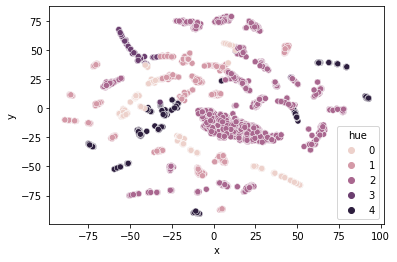

In [34]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# Ingrid Goes West

In [35]:
IngridGoesWest = pd.read_csv('IngridGoesWest.csv')
IngridGoesWest.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
IngridGoesWest.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2018-08-23 18:50:34  Another day another avocado toast. #avocadotoa...   
1  2018-08-23 17:32:00  #IngridGoesWest is a total package when you wa...   
2  2018-08-23 13:00:47  44. Step 45. The dark tower 46. Ingrid goes we...   
3  2018-08-23 04:13:02  INGRID GOES WEST [Official Teaser] - August 20...   
4  2018-08-23 02:50:58  two movies own my whole heart and that is the ...   

  language                                           hashtags      username  \
0       en  ['avocadotoast', 'ingridgoeswest', '31days31ph...  ShepherdGirl   
1       en                                 ['ingridgoeswest']  BisiAdediran   
2       en                                                 []   wawalily247   
3       en                                                 []   ScreenTweet   
4       en                                                 []    didntifade   

                                                link  retweet  nlikes  \
0  https://twitter.com/ShepherdGirl/status/103276...    False       0   
1  https://twitter.com/BisiAdediran/status/103274...    False       0   
2  https://twitter.com/wawalily247/status/1032674...    False       0   
3  https://twitter.com/ScreenTweet/status/1032541...    False       0   
4  https://twitter.com/didntifade/status/10325205...    False       1   

   nreplies  nretweets  retweet_date  vader_score  positive sentiment score  \
0         0          0           NaN       0.0000                     0.000   
1         0          0           NaN       0.3400                     0.111   
2         0          0           NaN       0.4404                     0.083   
3         0          0           NaN      -0.2500                     0.000   
4         0          0           NaN       0.6369                     0.208   

   negative sentiment score  neutral sentiment score  compound sentiment score  
0                     0.000                    1.000                    0.0000  
1                     0.062                    0.827                    0.3400  
2                     0.000                    0.917                    0.4404  
3                     0.182                    0.818                   -0.2500  
4                     0.000                    0.792                    0.6369

In [36]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in IngridGoesWest['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

[['another', 'day', 'another', 'avocado', 'toast', 'avocadotoast', 'ingridgoeswest', '31days31photos', 'https', 't', 'co', 'zgekn5ukvu'], ['ingridgoeswest', 'is', 'a', 'total', 'package', 'when', 'you', 'want', 'to', 'advise', 'your', 'sorry', 'ass', 'sm', 'addictive', 'self', 'love', 'for', 'oneself', 'is', 'key', 'and', 'should', 'not', 'be', 'influenced', 'by', 'sm', 'it', 'tells', 'the', 'story', 'of', 'addiction', 'fake', 'life', 'forcing', 'to', 'belong', 'giving', 'up', 'and', 'more', 'a', 'must', 'watch'], ['44', 'step', '45', 'the', 'dark', 'tower', '46', 'ingrid', 'goes', 'west', '47', 'naked', '2017', '48', 'good', 'time', '49', 'the', 'nut', 'job', '2', '50', 'the', 'wound', '51', 'a', 'gentleman', '52', 'the', 'beach', 'rats'], ['ingrid', 'goes', 'west', 'official', 'teaser', 'august', '2017', 'neon', 'https', 't', 'co', 'o7x4vnb7tp', 'https', 't', 'co', 'eoq7wd5cms'], ['two', 'movies', 'own', 'my', 'whole', 'heart', 'and', 'that', 'is', 'the', 'kings', 'of', 'summer', 'an

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#creating a stop words list - these words don't add much value
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# isolating every word within tweets for the Ingrid Goes West (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['another',
 'day',
 'another',
 'avocado',
 'toast',
 'avocadotoast',
 'ingridgoeswest',
 '31days31photos',
 'zgekn5ukvu',
 'ingridgoeswest',
 'total',
 'package',
 'want',
 'advise',
 'sorry',
 'ass',
 'sm',
 'addictive',
 'self',
 'love',
 'oneself',
 'key',
 'influenced',
 'sm',
 'tells',
 'story',
 'addiction',
 'fake',
 'life',
 'forcing',
 'belong',
 'giving',
 'must',
 'watch',
 '44',
 'step',
 '45',
 'dark',
 'tower',
 '46',
 'ingrid',
 'goes',
 'west',
 '47',
 'naked',
 '2017',
 '48',
 'good',
 'time',
 '49',
 'nut',
 'job',
 '2',
 '50',
 'wound',
 '51',
 'gentleman',
 '52',
 'beach',
 'rats',
 'ingrid',
 'goes',
 'west',
 'official',
 'teaser',
 'august',
 '2017',
 'neon',
 'o7x4vnb7tp',
 'eoq7wd5cms',
 'two',
 'movies',
 'whole',
 'heart',
 'kings',
 'summer',
 'ingrid',
 'goes',
 'west',
 'forever',
 'grateful',
 'film',
 'thank',
 'infinitely',
 'heart',
 'roadtrips',
 'made',
 'see',
 'film',
 'worth',
 'every',
 'time',
 'watch',
 'film',
 'love',
 'ingridgoeswest',
 'h

In [40]:
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['anoth',
  'day',
  'anoth',
  'avocado',
  'toast',
  'avocadotoast',
  'ingridgoeswest',
  '31days31photo',
  'zgekn5ukvu'],
 ['ingridgoeswest',
  'total',
  'packag',
  'want',
  'advis',
  'sorri',
  'ass',
  'sm',
  'addict',
  'self',
  'love',
  'oneself',
  'key',
  'influenc',
  'sm',
  'tell',
  'stori',
  'addict',
  'fake',
  'life',
  'forc',
  'belong',
  'give',
  'must',
  'watch'],
 ['44',
  'step',
  '45',
  'dark',
  'tower',
  '46',
  'ingrid',
  'goe',
  'west',
  '47',
  'nake',
  '2017',
  '48',
  'good',
  'time',
  '49',
  'nut',
  'job',
  '2',
  '50',
  'wound',
  '51',
  'gentleman',
  '52',
  'beach',
  'rat'],
 ['ingrid',
  'goe',
  'west',
  'offici',
  'teaser',
  'august',
  '2017',
  'neon',
  'o7x4vnb7tp',
  'eoq7wd5cm'],
 ['two', 'movi', 'whole', 'heart', 'king', 'summer', 'ingrid', 'goe', 'west'],
 ['forev',
  'grate',
  'film',
  'thank',
  'infinit',
  'heart',
  'roadtrip',
  'made',
  'see',
  'film',
  'worth',
  'everi',
  'time',
  'watch',

In [41]:
IngridGoesWest['stemmed'] = stemmed_tweets

stemmed_tweets_lst = []
for tweet in IngridGoesWest['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

IngridGoesWest['string_stemmed'] = stemmed_tweets_lst

IngridGoesWest.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2018-08-23 18:50:34  Another day another avocado toast. #avocadotoa...   
1  2018-08-23 17:32:00  #IngridGoesWest is a total package when you wa...   
2  2018-08-23 13:00:47  44. Step 45. The dark tower 46. Ingrid goes we...   
3  2018-08-23 04:13:02  INGRID GOES WEST [Official Teaser] - August 20...   
4  2018-08-23 02:50:58  two movies own my whole heart and that is the ...   

  language                                           hashtags      username  \
0       en  ['avocadotoast', 'ingridgoeswest', '31days31ph...  ShepherdGirl   
1       en                                 ['ingridgoeswest']  BisiAdediran   
2       en                                                 []   wawalily247   
3       en                                                 []   ScreenTweet   
4       en                                                 []    didntifade   

                                                link  retweet  nlikes  \
0  https://twitter.com/ShepherdGirl/status/103276...    False       0   
1  https://twitter.com/BisiAdediran/status/103274...    False       0   
2  https://twitter.com/wawalily247/status/1032674...    False       0   
3  https://twitter.com/ScreenTweet/status/1032541...    False       0   
4  https://twitter.com/didntifade/status/10325205...    False       1   

   nreplies  nretweets  retweet_date  vader_score  positive sentiment score  \
0         0          0           NaN       0.0000                     0.000   
1         0          0           NaN       0.3400                     0.111   
2         0          0           NaN       0.4404                     0.083   
3         0          0           NaN      -0.2500                     0.000   
4         0          0           NaN       0.6369                     0.208   

   negative sentiment score  neutral sentiment score  \
0                     0.000                    1.000   
1                     0.062                    0.827   
2                     0.000                    0.917   
3                     0.182                    0.818   
4                     0.000                    0.792   

   compound sentiment score  \
0                    0.0000   
1                    0.3400   
2                    0.4404   
3                   -0.2500   
4                    0.6369   

                                             stemmed  \
0  [anoth, day, anoth, avocado, toast, avocadotoa...   
1  [ingridgoeswest, total, packag, want, advis, s...   
2  [44, step, 45, dark, tower, 46, ingrid, goe, w...   
3  [ingrid, goe, west, offici, teaser, august, 20...   
4  [two, movi, whole, heart, king, summer, ingrid...   

                                      string_stemmed  
0  anoth day anoth avocado toast avocadotoast ing...  
1  ingridgoeswest total packag want advis sorri a...  
2  44 step 45 dark tower 46 ingrid goe west 47 na...  
3  ingrid goe west offici teaser august 2017 neon...  
4   two movi whole heart king summer ingrid goe west

In [42]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(IngridGoesWest['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


00  000  01  03  03r1y4v3l2  03ug2g0kfi  05  05mfzdgjrf  06  07  ...  \
0   0    0   0   0           0           0   0           0   0   0  ...   
1   0    0   0   0           0           0   0           0   0   0  ...   
2   0    0   0   0           0           0   0           0   0   0  ...   
3   0    0   0   0           0           0   0           0   0   0  ...   
4   0    0   0   0           0           0   0           0   0   0  ...   

   zvq9zr3hg  zvvrqycogw  zvyagintsev  zwfil4zopz  zwskaxpq6k  zx6079v1w9  \
0          0           0            0           0           0           0   
1          0           0            0           0           0           0   
2          0           0            0           0           0           0   
3          0           0            0           0           0           0   
4          0           0            0           0           0           0   

   zz31znmrok  zzbhlcobxr  zztd7pzbvc  zztopport  
0           0           0           0          0  
1           0           0           0          0  
2           0           0           0          0  
3           0           0           0          0  
4           0           0           0          0  

[5 rows x 8964 columns]

In [43]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
dictionary = corpora.Dictionary(IngridGoesWest['stemmed'])

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://www.kite.com/python/docs/gensim.corpora.Dictionary.doc2bow

In [48]:
corpus = []
for tweet in IngridGoesWest['stemmed']:
#     print(dictionary.doc2bow(tweet))
    corpus.append(dictionary.doc2bow(tweet))

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.102*"ingrid" + 0.100*"goe" + 0.100*"west" + 0.027*"watch" + 0.018*"movi" + 0.008*"dvd" + 0.008*"like" + 0.007*"win" + 0.006*"good" + 0.006*"heyuguy"'),
 (1,
  '0.040*"ingrid" + 0.039*"goe" + 0.038*"west" + 0.030*"ingridgoeswest" + 0.021*"movi" + 0.018*"plaza" + 0.018*"aubrey" + 0.013*"watch" + 0.012*"evilhag" + 0.010*"best"'),
 (2,
  '0.038*"ingrid" + 0.037*"goe" + 0.037*"west" + 0.019*"2017" + 0.017*"10" + 0.015*"spicer" + 0.014*"matt" + 0.010*"5" + 0.009*"ingridgoeswest" + 0.007*"2"'),
 (3,
  '0.049*"ingridgoeswest" + 0.018*"ingrid" + 0.017*"west" + 0.017*"goe" + 0.016*"watch" + 0.013*"win" + 0.012*"comedi" + 0.011*"social" + 0.010*"media" + 0.009*"2017"'),
 (4,
  '0.049*"ingrid" + 0.048*"goe" + 0.048*"west" + 0.017*"watch" + 0.013*"good" + 0.010*"film" + 0.010*"ingridgoeswest" + 0.008*"time" + 0.007*"big" + 0.007*"sick"')]

In [52]:
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.102*"ingrid" + 0.100*"goe" + 0.100*"west" + 0.027*"watch" + 0.018*"movi" + 0.008*"dvd" + 0.008*"like" + 0.007*"win" + 0.006*"good" + 0.006*"heyuguy"
Topic 1 
Words: 0.040*"ingrid" + 0.039*"goe" + 0.038*"west" + 0.030*"ingridgoeswest" + 0.021*"movi" + 0.018*"plaza" + 0.018*"aubrey" + 0.013*"watch" + 0.012*"evilhag" + 0.010*"best"
Topic 2 
Words: 0.038*"ingrid" + 0.037*"goe" + 0.037*"west" + 0.019*"2017" + 0.017*"10" + 0.015*"spicer" + 0.014*"matt" + 0.010*"5" + 0.009*"ingridgoeswest" + 0.007*"2"
Topic 3 
Words: 0.049*"ingridgoeswest" + 0.018*"ingrid" + 0.017*"west" + 0.017*"goe" + 0.016*"watch" + 0.013*"win" + 0.012*"comedi" + 0.011*"social" + 0.010*"media" + 0.009*"2017"
Topic 4 
Words: 0.049*"ingrid" + 0.048*"goe" + 0.048*"west" + 0.017*"watch" + 0.013*"good" + 0.010*"film" + 0.010*"ingridgoeswest" + 0.008*"time" + 0.007*"big" + 0.007*"sick"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.100720  0.053030       1        1  36.561141
1      0.025471  0.060959       2        1  27.856193
4      0.055851 -0.033317       3        1  16.234492
2     -0.035608 -0.152006       4        1  10.428527
3     -0.146433  0.071334       5        1   8.919647, topic_info=               Term        Freq        Total Category  logprob  loglift
5    ingridgoeswest  959.000000   959.000000  Default  30.0000  30.0000
817              10  121.000000   121.000000  Default  29.0000  29.0000
31             2017  405.000000   405.000000  Default  28.0000  28.0000
241           plaza  370.000000   370.000000  Default  27.0000  27.0000
232          aubrey  369.000000   369.000000  Default  26.0000  26.0000
..              ...         ...          ...      ...      ...      ...
46           ingrid   98.683170  3854.342347   Topic5  -4.0257  -1.2481
54             west   96.337077  3742.732864   Topic5  -4.0497  -1.2428
44              goe   95.107322  3765.241191   Topic5  -4.0626  -1.2616
18             love   32.615035   303.273431   Topic5  -5.1328   0.1871
79   osheajacksonjr   21.790753   118.562334   Topic5  -5.5361   0.7230

[353 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
214       1  0.106005           1
214       2  0.365127           1
214       3  0.106005           1
214       4  0.376905           1
214       5  0.058891           1
...     ...       ...         ...
3861      2  0.800934     written
5792      1  0.868663  xunlwectek
5751      1  0.868660  y4ldygbijo
5522      4  0.928592     yodajon
5785      1  0.868672   you7c8cjr

[732 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

# Big Sick

In [2]:
#read in the Big Sick
BigSick = pd.read_csv('BigSick.csv')
BigSick.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigSick.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2018-07-12 19:40:09  @kumailn I just saw the Big Sick and you are a...   
1  2018-07-12 19:25:45  @kumailn Just finished The Big Sick.  It was s...   
2  2018-07-12 19:02:35  I added a video to a @YouTube playlist  https:...   
3  2018-07-12 17:22:11  @kumailn damn why did I just now watch the big...   
4  2018-07-12 15:39:02  At the beginning of a relationship: “omg you’r...   

  language hashtags        username  \
0       en       []       lellomoke   
1       en       []      klingerock   
2       en       []  TheRedShamrock   
3       en       []  hanneskaeufler   
4       en       []     EwdatsGROSS   

                                                link  retweet  nlikes  \
0  https://twitter.com/lellomoke/status/101755423...    False       0   
1  https://twitter.com/klingerock/status/10175506...    False       0   
2  https://twitter.com/TheRedShamrock/status/1017...    False       0   
3  https://twitter.com/hanneskaeufler/status/1017...    False       1   
4  https://twitter.com/EwdatsGROSS/status/1017493...    False      34   

   nreplies  nretweets  vader_score  positive sentiment score  \
0         0          0       0.7384                     0.245   
1         0          0       0.3268                     0.274   
2         0          0      -0.5106                     0.000   
3         1          0      -0.4017                     0.172   
4         0          3       0.0785                     0.182   

   negative sentiment score  neutral sentiment score  compound sentiment score  
0                     0.095                    0.660                    0.7384  
1                     0.195                    0.531                    0.3268  
2                     0.202                    0.798                   -0.5106  
3                     0.301                    0.527                   -0.4017  
4                     0.176                    0.642                    0.0785

In [4]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigSick['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

[['kumailn', 'i', 'just', 'saw', 'the', 'big', 'sick', 'and', 'you', 'are', 'amazing', 'and', 'i', 'am', 'so', 'happy', 'your', 'wife', 'has', 'recovered'], ['kumailn', 'just', 'finished', 'the', 'big', 'sick', 'it', 'was', 'so', 'fucking', 'good'], ['i', 'added', 'a', 'video', 'to', 'a', 'youtube', 'playlist', 'https', 't', 'co', '3oxcf1nudy', 's5e29', '2017', 's', 'the', 'big', 'sick'], ['kumailn', 'damn', 'why', 'did', 'i', 'just', 'now', 'watch', 'the', 'big', 'sick', 'really', 'enjoyed', 'it'], ['at', 'the', 'beginning', 'of', 'a', 'relationship', 'omg', 'you', 're', 'so', 'funny', 'i', 'love', 'your', 'sense', 'of', 'humour', 'in', 'a', 'relationship', 'now', 'we', 'are', 'literally', 'at', 'the', 'hospital', 'finding', 'out', 'if', 'your', 'uncle', 'has', 'cancer', 'can', 'you', 'stop', 'making', 'jokes', 'about', 'big', 'sick', 'energy'], ['dmw', 'directs', 'the', 'crown', 'is', 'on', 'netflix', 'not', 'hbo', 'also', 'i', 'loved', 'the', 'movie', 'the', 'big', 'sick', 'it', 's'

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#stemming tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['kumailn', 'saw', 'big', 'sick', 'amaz', 'happi', 'wife', 'recov'],
 ['kumailn', 'finish', 'big', 'sick', 'fuck', 'good'],
 ['ad',
  'video',
  'youtub',
  'playlist',
  '3oxcf1nudi',
  's5e29',
  '2017',
  'big',
  'sick'],
 ['kumailn', 'damn', 'watch', 'big', 'sick', 'realli', 'enjoy'],
 ['begin',
  'relationship',
  'omg',
  'funni',
  'love',
  'sens',
  'humour',
  'relationship',
  'liter',
  'hospit',
  'find',
  'uncl',
  'cancer',
  'stop',
  'make',
  'joke',
  'big',
  'sick',
  'energi'],
 ['dmw',
  'direct',
  'crown',
  'netflix',
  'hbo',
  'also',
  'love',
  'movi',
  'big',
  'sick',
  'amazon'],
 ['runner',
  'up',
  'edg',
  'tomorrow',
  'martian',
  'boyhood',
  'ratatouil',
  'black',
  'panther',
  'big',
  'sick',
  'tonya',
  'list',
  'goe'],
 ['phone',
  'cultur',
  'demand',
  'drop',
  'pod',
  'day',
  'earli',
  'sic',
  'episod',
  'folk',
  'talk',
  'sicario',
  '2',
  'big',
  'sick',
  'sic',
  'man',
  'josh',
  'brolin',
  'wnholzzxov',
  'rt5yn

In [17]:
#adding to Big Sick dataframe 

#stemmed tweets list version
BigSick['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in BigSick['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

BigSick['string_stemmed'] = stemmed_tweets_str_lst

BigSick.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2018-07-12 19:40:09  @kumailn I just saw the Big Sick and you are a...   
1  2018-07-12 19:25:45  @kumailn Just finished The Big Sick.  It was s...   
2  2018-07-12 19:02:35  I added a video to a @YouTube playlist  https:...   
3  2018-07-12 17:22:11  @kumailn damn why did I just now watch the big...   
4  2018-07-12 15:39:02  At the beginning of a relationship: “omg you’r...   

  language hashtags        username  \
0       en       []       lellomoke   
1       en       []      klingerock   
2       en       []  TheRedShamrock   
3       en       []  hanneskaeufler   
4       en       []     EwdatsGROSS   

                                                link  retweet  nlikes  \
0  https://twitter.com/lellomoke/status/101755423...    False       0   
1  https://twitter.com/klingerock/status/10175506...    False       0   
2  https://twitter.com/TheRedShamrock/status/1017...    False       0   
3  https://twitter.com/hanneskaeufler/status/1017...    False       1   
4  https://twitter.com/EwdatsGROSS/status/1017493...    False      34   

   nreplies  nretweets  vader_score  positive sentiment score  \
0         0          0       0.7384                     0.245   
1         0          0       0.3268                     0.274   
2         0          0      -0.5106                     0.000   
3         1          0      -0.4017                     0.172   
4         0          3       0.0785                     0.182   

   negative sentiment score  neutral sentiment score  \
0                     0.095                    0.660   
1                     0.195                    0.531   
2                     0.202                    0.798   
3                     0.301                    0.527   
4                     0.176                    0.642   

   compound sentiment score  \
0                    0.7384   
1                    0.3268   
2                   -0.5106   
3                   -0.4017   
4                    0.0785   

                                             stemmed  \
0  [kumailn, saw, big, sick, amaz, happi, wife, r...   
1           [kumailn, finish, big, sick, fuck, good]   
2  [ad, video, youtub, playlist, 3oxcf1nudi, s5e2...   
3   [kumailn, damn, watch, big, sick, realli, enjoy]   
4  [begin, relationship, omg, funni, love, sens, ...   

                                      string_stemmed  
0         kumailn saw big sick amaz happi wife recov  
1                  kumailn finish big sick fuck good  
2  ad video youtub playlist 3oxcf1nudi s5e29 2017...  
3           kumailn damn watch big sick realli enjoy  
4  begin relationship omg funni love sens humour ...

In [19]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigSick['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


00  000  007  00pm  01  02  025  02uemq83hd  03  03mz3dbxtl  ...  \
0   0    0    0     0   0   0    0           0   0           0  ...   
1   0    0    0     0   0   0    0           0   0           0  ...   
2   0    0    0     0   0   0    0           0   0           0  ...   
3   0    0    0     0   0   0    0           0   0           0  ...   
4   0    0    0     0   0   0    0           0   0           0  ...   

   ztbqrlfr7j  zto8ktfnwv  ztxyln1gso  zucchini  zucker  zumanurr  zve60sra4b  \
0           0           0           0         0       0         0           0   
1           0           0           0         0       0         0           0   
2           0           0           0         0       0         0           0   
3           0           0           0         0       0         0           0   
4           0           0           0         0       0         0           0   

   zw1ukjimji  zy3pcbgrrv  zzo9yhxcjp  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 10392 columns]

In [20]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
dictionary = corpora.Dictionary(BigSick['stemmed'])

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
corpus = []
for tweet in BigSick['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.054*"big" + 0.053*"sick" + 0.028*"kumail" + 0.023*"nanjiani" + 0.014*"valley" + 0.013*"silicon" + 0.012*"talk" + 0.011*"deal" + 0.009*"fear" + 0.009*"failur"'),
 (1,
  '0.066*"big" + 0.066*"sick" + 0.022*"watch" + 0.010*"movi" + 0.008*"love" + 0.007*"last" + 0.005*"year" + 0.004*"night" + 0.004*"kumailn" + 0.004*"comedi"'),
 (2,
  '0.031*"big" + 0.030*"sick" + 0.017*"2017" + 0.012*"10" + 0.010*"2016" + 0.010*"3" + 0.009*"2015" + 0.009*"2014" + 0.009*"2013" + 0.009*"2010"'),
 (3,
  '0.093*"big" + 0.091*"sick" + 0.026*"kumailn" + 0.023*"watch" + 0.022*"movi" + 0.014*"love" + 0.011*"good" + 0.009*"like" + 0.007*"film" + 0.007*"great"'),
 (4,
  '0.050*"big" + 0.050*"sick" + 0.022*"2017" + 0.016*"michael" + 0.015*"showalt" + 0.010*"film" + 0.010*"seri" + 0.008*"director" + 0.008*"comedi" + 0.008*"appl"')]

In [25]:
#clarity
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.054*"big" + 0.053*"sick" + 0.028*"kumail" + 0.023*"nanjiani" + 0.014*"valley" + 0.013*"silicon" + 0.012*"talk" + 0.011*"deal" + 0.009*"fear" + 0.009*"failur"
Topic 1 
Words: 0.066*"big" + 0.066*"sick" + 0.022*"watch" + 0.010*"movi" + 0.008*"love" + 0.007*"last" + 0.005*"year" + 0.004*"night" + 0.004*"kumailn" + 0.004*"comedi"
Topic 2 
Words: 0.031*"big" + 0.030*"sick" + 0.017*"2017" + 0.012*"10" + 0.010*"2016" + 0.010*"3" + 0.009*"2015" + 0.009*"2014" + 0.009*"2013" + 0.009*"2010"
Topic 3 
Words: 0.093*"big" + 0.091*"sick" + 0.026*"kumailn" + 0.023*"watch" + 0.022*"movi" + 0.014*"love" + 0.011*"good" + 0.009*"like" + 0.007*"film" + 0.007*"great"
Topic 4 
Words: 0.050*"big" + 0.050*"sick" + 0.022*"2017" + 0.016*"michael" + 0.015*"showalt" + 0.010*"film" + 0.010*"seri" + 0.008*"director" + 0.008*"comedi" + 0.008*"appl"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.124660 -0.045456       1        1  46.294721
1     -0.061875 -0.056000       2        1  20.874004
2      0.149540 -0.098924       3        1  11.798333
0     -0.035291  0.082017       4        1  11.261451
4      0.072287  0.118363       5        1   9.771492, topic_info=         Term         Freq        Total Category  logprob  loglift
268    kumail   292.000000   292.000000  Default  30.0000  30.0000
11       2017   373.000000   373.000000  Default  29.0000  29.0000
402  nanjiani   189.000000   189.000000  Default  28.0000  28.0000
6        sick  4768.000000  4768.000000  Default  27.0000  27.0000
1         big  4844.000000  4844.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
1         big   332.186539  4844.894767   Topic5  -2.9926  -0.3543
349      film    65.434648   369.800619   Topic5  -4.6173   0.5938
327         7    22.579859    63.991885   Topic5  -5.6812   1.2840
44       movi    38.097150   915.088798   Topic5  -5.1582  -0.8532
254       new    22.222802    98.400379   Topic5  -5.6972   0.8378

[344 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6585      5  0.892692  0utxlznydf
342       1  0.220589           1
342       2  0.150930           1
342       3  0.545668           1
342       4  0.046440           1
...     ...       ...         ...
337       5  0.035439        year
3653      2  0.790580        zayn
1431      1  0.920844   zoeinthec
1431      3  0.030695   zoeinthec
1431      4  0.030695   zoeinthec

[766 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 5])

# Gone Girl

In [27]:
GoneGirl = pd.read_csv('GoneGirl.csv')
GoneGirl.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
GoneGirl.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2015-10-01 19:49:05  (#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...   
1  2015-10-01 19:48:58                 @chlomeganda gone girl chloeeee :)   
2  2015-10-01 19:48:09  (#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....   
3  2015-10-01 19:46:52  Suspect indicted in Vallejo 'Gone Girl' kidnap...   
4  2015-10-01 19:45:48       Gone Girl is a fucking crazy movie #thumbsup   

  language       hashtags       username  \
0       en  ['untildawn']    bradyonetta   
1       en             []  ChanwooCheeks   
2       en  ['untildawn']    bradyonetta   
3       en             []      OmarAzimi   
4       en   ['thumbsup']       kempatsu   

                                                link  retweet  nlikes  \
0  https://twitter.com/bradyonetta/status/6497327...    False       1   
1  https://twitter.com/ChanwooCheeks/status/64973...    False       0   
2  https://twitter.com/bradyonetta/status/6497325...    False       0   
3  https://twitter.com/OmarAzimi/status/649732240...    False       1   
4  https://twitter.com/kempatsu/status/6497319736...    False       1   

   nreplies  nretweets                                        vader_score  \
0         1          0  {'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...   
1         1          0  {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...   
2         1          0  {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...   
3         0          0  {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...   
4         0          0  {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...   

   positive sentiment score  negative sentiment score  \
0                     0.000                     0.299   
1                     0.429                     0.000   
2                     0.000                     0.407   
3                     0.000                     0.104   
4                     0.000                     0.278   

   neutral sentiment score  compound sentiment score  
0                    0.701                   -0.5904  
1                    0.571                    0.4588  
2                    0.593                   -0.7824  
3                    0.896                   -0.2960  
4                    0.722                   -0.4005

In [28]:
#tokenizing each tweet
tokenized_tweets_GoneGirl = []
for tweet in GoneGirl['tweet']:
    tokenized_tweets_GoneGirl.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets_GoneGirl)

[['untildawn', 'spoilers', 'he', 'gone', 'girl', 'd', 'his', 'phalanges', 'enough', 'cry', 'enough'], ['chlomeganda', 'gone', 'girl', 'chloeeee'], ['untildawn', 'spoilers', 'open', 'the', 'bear', 'trap', 'cry', 'don', 't', 'gone', 'girl', 'his', 'phalanges'], ['suspect', 'indicted', 'in', 'vallejo', 'gone', 'girl', 'kidnapping', 'case', 'a', 'harvard', 'law', 'school', 'graduate', 'and', 'former', 'u', 's', 'marine', 'has', 'http', 't', 'co', 'nfjshwvee9'], ['gone', 'girl', 'is', 'a', 'fucking', 'crazy', 'movie', 'thumbsup'], ['gone', 'girl', 'the', 'movie', 'was', 'so', 'messed', 'up', 'and', 'weird', 'but', 'it', 'was', 'good'], ['breakingnews', 'suspect', 'indicted', 'in', 'mysterious', 'gone', 'girl', 'kidnapping', 'case', 'in', 'vallejo', 'http', 't', 'co', '1bhrjbcu5q'], ['i', 'love', 'gone', 'girl', 'srry'], ['book', 'gone', 'girl', 'http', 't', 'co', 'fz3esjr7dd', 'wlcauthor', 'scifibooks'], ['adamberry', 'hayleyqpr', 'i', 'never', 'swear', 'on', 'twitter', 'but', 'i', 'thought

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
#stemming each tweet
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets_GoneGirl:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['untildawn',
  'spoiler',
  'gone',
  'girl',
  'phalang',
  'enough',
  'cri',
  'enough'],
 ['chlomeganda', 'gone', 'girl', 'chloeeee'],
 ['untildawn',
  'spoiler',
  'open',
  'bear',
  'trap',
  'cri',
  'gone',
  'girl',
  'phalang'],
 ['suspect',
  'indict',
  'vallejo',
  'gone',
  'girl',
  'kidnap',
  'case',
  'harvard',
  'law',
  'school',
  'graduat',
  'former',
  'marin',
  'nfjshwvee9'],
 ['gone', 'girl', 'fuck', 'crazi', 'movi', 'thumbsup'],
 ['gone', 'girl', 'movi', 'mess', 'weird', 'good'],
 ['breakingnew',
  'suspect',
  'indict',
  'mysteri',
  'gone',
  'girl',
  'kidnap',
  'case',
  'vallejo',
  '1bhrjbcu5q'],
 ['love', 'gone', 'girl', 'srri'],
 ['book', 'gone', 'girl', 'fz3esjr7dd', 'wlcauthor', 'scifibook'],
 ['adamberri',
  'hayleyqpr',
  'never',
  'swear',
  'twitter',
  'thought',
  'shit',
  'mate',
  'mayb',
  'critic',
  'see',
  'someth',
  'didnt',
  'gonegirl'],
 ['mr',
  'drw',
  'read',
  'ladi',
  'gone',
  'girl',
  'book',
  'gillian',
  'some

In [30]:
#adding to Gone Girl dataframe 

#stemmed tweets list version
GoneGirl['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in GoneGirl['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

GoneGirl['string_stemmed'] = stemmed_tweets_str_lst

GoneGirl.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2015-10-01 19:49:05  (#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...   
1  2015-10-01 19:48:58                 @chlomeganda gone girl chloeeee :)   
2  2015-10-01 19:48:09  (#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....   
3  2015-10-01 19:46:52  Suspect indicted in Vallejo 'Gone Girl' kidnap...   
4  2015-10-01 19:45:48       Gone Girl is a fucking crazy movie #thumbsup   

  language       hashtags       username  \
0       en  ['untildawn']    bradyonetta   
1       en             []  ChanwooCheeks   
2       en  ['untildawn']    bradyonetta   
3       en             []      OmarAzimi   
4       en   ['thumbsup']       kempatsu   

                                                link  retweet  nlikes  \
0  https://twitter.com/bradyonetta/status/6497327...    False       1   
1  https://twitter.com/ChanwooCheeks/status/64973...    False       0   
2  https://twitter.com/bradyonetta/status/6497325...    False       0   
3  https://twitter.com/OmarAzimi/status/649732240...    False       1   
4  https://twitter.com/kempatsu/status/6497319736...    False       1   

   nreplies  nretweets                                        vader_score  \
0         1          0  {'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...   
1         1          0  {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...   
2         1          0  {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...   
3         0          0  {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...   
4         0          0  {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...   

   positive sentiment score  negative sentiment score  \
0                     0.000                     0.299   
1                     0.429                     0.000   
2                     0.000                     0.407   
3                     0.000                     0.104   
4                     0.000                     0.278   

   neutral sentiment score  compound sentiment score  \
0                    0.701                   -0.5904   
1                    0.571                    0.4588   
2                    0.593                   -0.7824   
3                    0.896                   -0.2960   
4                    0.722                   -0.4005   

                                             stemmed  \
0  [untildawn, spoiler, gone, girl, phalang, enou...   
1                [chlomeganda, gone, girl, chloeeee]   
2  [untildawn, spoiler, open, bear, trap, cri, go...   
3  [suspect, indict, vallejo, gone, girl, kidnap,...   
4          [gone, girl, fuck, crazi, movi, thumbsup]   

                                      string_stemmed  
0  untildawn spoiler gone girl phalang enough cri...  
1                     chlomeganda gone girl chloeeee  
2  untildawn spoiler open bear trap cri gone girl...  
3  suspect indict vallejo gone girl kidnap case h...  
4                 gone girl fuck crazi movi thumbsup

In [31]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(GoneGirl['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


00  000th  01  02  039  04utpoqzdk  06izylta51  06zxxykdsj  07wgg3sjh9  \
0   0      0   0   0    0           0           0           0           0   
1   0      0   0   0    0           0           0           0           0   
2   0      0   0   0    0           0           0           0           0   
3   0      0   0   0    0           0           0           0           0   
4   0      0   0   0    0           0           0           0           0   

   08fi9pg6oi  ...  zt  zta9g7kncl  ztksz6zurr  zulaikhafadir  zulfikamohd  \
0           0  ...   0           0           0              0            0   
1           0  ...   0           0           0              0            0   
2           0  ...   0           0           0              0            0   
3           0  ...   0           0           0              0            0   
4           0  ...   0           0           0              0            0   

   zurich  zusak  zv7jly9wel  zvuwfji59v  zzts2ihfdp  
0       0      0           0           0           0  
1       0      0           0           0           0  
2       0      0           0           0           0  
3       0      0           0           0           0  
4       0      0           0           0           0  

[5 rows x 6899 columns]

In [32]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
dictionary = corpora.Dictionary(GoneGirl['stemmed'])

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
corpus = []
for tweet in GoneGirl['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.068*"girl" + 0.067*"gone" + 0.015*"ben" + 0.013*"affleck" + 0.013*"review" + 0.012*"gillian" + 0.012*"flynn" + 0.007*"next" + 0.007*"love" + 0.007*"movi"'),
 (1,
  '0.117*"girl" + 0.099*"gone" + 0.030*"read" + 0.011*"book" + 0.010*"train" + 0.009*"flynn" + 0.009*"gillian" + 0.008*"nw" + 0.008*"comparison" + 0.008*"fair"'),
 (2,
  '0.054*"gone" + 0.054*"girl" + 0.035*"book" + 0.020*"read" + 0.018*"gonegirl" + 0.015*"movi" + 0.011*"love" + 0.010*"best" + 0.009*"ever" + 0.008*"flynn"'),
 (3,
  '0.110*"girl" + 0.096*"gone" + 0.011*"suspens" + 0.011*"train" + 0.011*"writer" + 0.011*"learn" + 0.011*"join" + 0.010*"movi" + 0.010*"ramwrit" + 0.010*"qwqgukxak4"'),
 (4,
  '0.130*"girl" + 0.130*"gone" + 0.056*"watch" + 0.027*"movi" + 0.018*"gonegirl" + 0.012*"good" + 0.011*"like" + 0.009*"time" + 0.008*"fuck" + 0.007*"crazi"')]

In [36]:
#clarity
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.068*"girl" + 0.067*"gone" + 0.015*"ben" + 0.013*"affleck" + 0.013*"review" + 0.012*"gillian" + 0.012*"flynn" + 0.007*"next" + 0.007*"love" + 0.007*"movi"
Topic 1 
Words: 0.117*"girl" + 0.099*"gone" + 0.030*"read" + 0.011*"book" + 0.010*"train" + 0.009*"flynn" + 0.009*"gillian" + 0.008*"nw" + 0.008*"comparison" + 0.008*"fair"
Topic 2 
Words: 0.054*"gone" + 0.054*"girl" + 0.035*"book" + 0.020*"read" + 0.018*"gonegirl" + 0.015*"movi" + 0.011*"love" + 0.010*"best" + 0.009*"ever" + 0.008*"flynn"
Topic 3 
Words: 0.110*"girl" + 0.096*"gone" + 0.011*"suspens" + 0.011*"train" + 0.011*"writer" + 0.011*"learn" + 0.011*"join" + 0.010*"movi" + 0.010*"ramwrit" + 0.010*"qwqgukxak4"
Topic 4 
Words: 0.130*"girl" + 0.130*"gone" + 0.056*"watch" + 0.027*"movi" + 0.018*"gonegirl" + 0.012*"good" + 0.011*"like" + 0.009*"time" + 0.008*"fuck" + 0.007*"crazi"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.118678  0.025430       1        1  40.730138
1      0.007697  0.026295       2        1  21.180367
3      0.050649 -0.081492       3        1  16.533929
0     -0.106693 -0.082525       4        1  10.793487
2     -0.070331  0.112292       5        1  10.762079, topic_info=      Term         Freq        Total Category  logprob  loglift
98   watch   928.000000   928.000000  Default  30.0000  30.0000
61    read   345.000000   345.000000  Default  29.0000  29.0000
36    book   267.000000   267.000000  Default  28.0000  28.0000
2     girl  4343.000000  4343.000000  Default  27.0000  27.0000
88   train   160.000000   160.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
381    way    15.784160    51.784920   Topic5  -5.6041   1.0410
28    good    26.781614   266.318842   Topic5  -5.0754  -0.0678
281    end    18.423768   128.393493   Topic5  -5.4495   0.2877
289   feel    14.754768    65.596657   Topic5  -5.6716   0.7372
59     one    15.569191   124.067570   Topic5  -5.6178   0.1536

[324 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
275       2  0.135208      11
275       4  0.027042      11
275       5  0.838289      11
178       1  0.151156    2014
178       2  0.178639    2014
...     ...       ...     ...
486       3  0.314480    year
486       4  0.146758    year
673       1  0.350074  youtub
673       3  0.175037  youtub
673       4  0.481352  youtub

[551 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

# 17 Again

In [38]:
#read in 17 Again
Again17 = pd.read_csv('Again17.csv')
Again17.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Again17.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2010-04-12 19:44:15   http://bit.ly/bqye6j where can i get a dress ...   
1  2010-04-12 19:28:20         watching 17 Again. :) i missed this movie.   
2  2010-04-12 19:27:47  @conallen haha not surprising. "17 Again" seem...   
3  2010-04-12 19:25:32  @tjlyricz just gonna watch 17 again, and you g...   
4  2010-04-12 19:21:54  @jacobjunior7 yeah more boyish then which is w...   

  language hashtags        username  \
0       en       []  MarleneJenkins   
1       en       []   EuniceHilario   
2       en       []      sunnyjac0b   
3       en       []  desireefurlong   
4       en       []        conallen   

                                                link  retweet  nlikes  \
0  https://twitter.com/MarleneJenkins/status/1207...    False       0   
1  https://twitter.com/EuniceHilario/status/12072...    False       0   
2  https://twitter.com/sunnyjac0b/status/12072044784    False       0   
3  https://twitter.com/desireefurlong/status/1207...    False       0   
4    https://twitter.com/conallen/status/12071772509    False       0   

   nreplies  nretweets                                        vader_score  \
0         0          0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
1         0          0  {'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...   
2         0          0  {'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...   
3         0          0  {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...   
4         0          0  {'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...   

   positive sentiment score  negative sentiment score  \
0                     0.000                     0.000   
1                     0.268                     0.196   
2                     0.249                     0.076   
3                     0.136                     0.000   
4                     0.210                     0.082   

   neutral sentiment score  compound sentiment score  
0                    1.000                    0.0000  
1                    0.536                    0.2023  
2                    0.675                    0.6232  
3                    0.864                    0.4588  
4                    0.709                    0.4552

In [42]:
#tokenizing each tweet
tokenized_tweets_17Again = []
for tweet in Again17['tweet']:
    tokenized_tweets_17Again.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets_17Again)

[['http', 'bit', 'ly', 'bqye6j', 'where', 'can', 'i', 'get', 'a', 'dress', 'similar', 'to', 'the', 'zac', 'posen', 'dress', 'vanessa', 'hudgens', 'wore', 'to', 'the', '17', 'again', 'premiere', 'zac', 'posen'], ['watching', '17', 'again', 'i', 'missed', 'this', 'movie'], ['conallen', 'haha', 'not', 'surprising', '17', 'again', 'seemed', 'to', 'be', 'the', 'trigger', 'for', 'quite', 'a', 'few', 'converts', 'he', 's', 'a', 'charmer'], ['tjlyricz', 'just', 'gonna', 'watch', '17', 'again', 'and', 'you', 'gotta', 'loove', 'being', 'a', 'late', 'night', 'tweeter', 'haha', 'what', 'you', 'doing', 'xxxxx'], ['jacobjunior7', 'yeah', 'more', 'boyish', 'then', 'which', 'is', 'why', 'i', 'didn', 't', 'really', 'pay', 'attention', 'i', 'saw', '17', 'again', 'one', 'scene', 'made', 'me', 'go', 'o', 'o', 'whoa', 'lol'], ['crabstickz', 'at', 'the', 'game', 'that', 'was', 'set', 'in', 'like', 'the', '80', 's', 'or', 'something', 'there', 'was', 'a', 'guy', 'in', 'a', 'paramore', 'shirt', '17', 'again',

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
#stemming tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets_17Again:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['bit',
  'bqye6j',
  'dress',
  'similar',
  'zac',
  'posen',
  'dress',
  'vanessa',
  'hudgen',
  'wore',
  '17',
  'premier',
  'zac',
  'posen'],
 ['watch', '17', 'miss', 'movi'],
 ['conallen',
  'haha',
  'surpris',
  '17',
  'seem',
  'trigger',
  'quit',
  'convert',
  'charmer'],
 ['tjlyricz',
  'gonna',
  'watch',
  '17',
  'gotta',
  'loov',
  'late',
  'night',
  'tweeter',
  'haha',
  'xxxxx'],
 ['jacobjunior7',
  'yeah',
  'boyish',
  'realli',
  'pay',
  'attent',
  'saw',
  '17',
  'one',
  'scene',
  'made',
  'go',
  'whoa',
  'lol'],
 ['crabstickz',
  'game',
  'set',
  'like',
  '80',
  'someth',
  'guy',
  'paramor',
  'shirt',
  '17',
  'fail'],
 ['thenicolecoop', 'pictur', 'zac', 'efron', '17', 'part', 'get', 'car'],
 ['lol', 'sam', 'text', '17', 'quot'],
 ['brother',
  'said',
  'apparantli',
  '17',
  '1',
  'basketbal',
  'scene',
  'someon',
  'audienc',
  'wear',
  'paramor',
  'shirt'],
 ['watch', '17', 'brilliant', 'movi', 'wish', 'life', 'realli', 'like

In [44]:
#adding to 17 Again to dataframe 

#stemmed tweets list version
Again17['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in Again17['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

Again17['string_stemmed'] = stemmed_tweets_str_lst

Again17.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2010-04-12 19:44:15   http://bit.ly/bqye6j where can i get a dress ...   
1  2010-04-12 19:28:20         watching 17 Again. :) i missed this movie.   
2  2010-04-12 19:27:47  @conallen haha not surprising. "17 Again" seem...   
3  2010-04-12 19:25:32  @tjlyricz just gonna watch 17 again, and you g...   
4  2010-04-12 19:21:54  @jacobjunior7 yeah more boyish then which is w...   

  language hashtags        username  \
0       en       []  MarleneJenkins   
1       en       []   EuniceHilario   
2       en       []      sunnyjac0b   
3       en       []  desireefurlong   
4       en       []        conallen   

                                                link  retweet  nlikes  \
0  https://twitter.com/MarleneJenkins/status/1207...    False       0   
1  https://twitter.com/EuniceHilario/status/12072...    False       0   
2  https://twitter.com/sunnyjac0b/status/12072044784    False       0   
3  https://twitter.com/desireefurlong/status/1207...    False       0   
4    https://twitter.com/conallen/status/12071772509    False       0   

   nreplies  nretweets                                        vader_score  \
0         0          0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
1         0          0  {'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...   
2         0          0  {'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...   
3         0          0  {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...   
4         0          0  {'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...   

   positive sentiment score  negative sentiment score  \
0                     0.000                     0.000   
1                     0.268                     0.196   
2                     0.249                     0.076   
3                     0.136                     0.000   
4                     0.210                     0.082   

   neutral sentiment score  compound sentiment score  \
0                    1.000                    0.0000   
1                    0.536                    0.2023   
2                    0.675                    0.6232   
3                    0.864                    0.4588   
4                    0.709                    0.4552   

                                             stemmed  \
0  [bit, bqye6j, dress, similar, zac, posen, dres...   
1                            [watch, 17, miss, movi]   
2  [conallen, haha, surpris, 17, seem, trigger, q...   
3  [tjlyricz, gonna, watch, 17, gotta, loov, late...   
4  [jacobjunior7, yeah, boyish, realli, pay, atte...   

                                      string_stemmed  
0  bit bqye6j dress similar zac posen dress vanes...  
1                                 watch 17 miss movi  
2  conallen haha surpris 17 seem trigger quit con...  
3  tjlyricz gonna watch 17 gotta loov late night ...  
4  jacobjunior7 yeah boyish realli pay attent saw...

In [45]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Again17['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


00  01  02  021010  03  04  05  06  07  08  ...  zoeblais2010zo  zomg  \
0   0   0   0       0   0   0   0   0   0   0  ...               0     0   
1   0   0   0       0   0   0   0   0   0   0  ...               0     0   
2   0   0   0       0   0   0   0   0   0   0  ...               0     0   
3   0   0   0       0   0   0   0   0   0   0  ...               0     0   
4   0   0   0       0   0   0   0   0   0   0  ...               0     0   

   zone  zoo  zoom  zoradarosa  zqaddict  zxfsb  zzzdaria  zzzzz  
0     0    0     0           0         0      0         0      0  
1     0    0     0           0         0      0         0      0  
2     0    0     0           0         0      0         0      0  
3     0    0     0           0         0      0         0      0  
4     0    0     0           0         0      0         0      0  

[5 rows x 6960 columns]

In [46]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
dictionary = corpora.Dictionary(Again17['stemmed'])

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
corpus = []
for tweet in Again17['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.109*"17" + 0.025*"watch" + 0.010*"watchin" + 0.008*"good" + 0.007*"love" + 0.007*"gonna" + 0.006*"lol" + 0.006*"like" + 0.005*"im" + 0.005*"movi"'),
 (1,
  '0.107*"17" + 0.066*"movi" + 0.060*"watch" + 0.042*"zac" + 0.037*"efron" + 0.019*"love" + 0.014*"good" + 0.012*"lol" + 0.011*"like" + 0.008*"17again"'),
 (2,
  '0.087*"17" + 0.027*"like" + 0.017*"feel" + 0.008*"bit" + 0.007*"vote" + 0.007*"go" + 0.007*"lol" + 0.007*"day" + 0.006*"make" + 0.006*"zac"'),
 (3,
  '0.143*"17" + 0.071*"watch" + 0.013*"zac" + 0.011*"3" + 0.010*"love" + 0.009*"efron" + 0.008*"like" + 0.007*"lol" + 0.006*"think" + 0.005*"back"'),
 (4,
  '0.073*"17" + 0.037*"zoeblai" + 0.029*"watch" + 0.018*"4" + 0.016*"beauti" + 0.016*"win" + 0.015*"tweet" + 0.014*"person" + 0.014*"pack" + 0.014*"prize"')]

In [50]:
#clarity
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.109*"17" + 0.025*"watch" + 0.010*"watchin" + 0.008*"good" + 0.007*"love" + 0.007*"gonna" + 0.006*"lol" + 0.006*"like" + 0.005*"im" + 0.005*"movi"
Topic 1 
Words: 0.107*"17" + 0.066*"movi" + 0.060*"watch" + 0.042*"zac" + 0.037*"efron" + 0.019*"love" + 0.014*"good" + 0.012*"lol" + 0.011*"like" + 0.008*"17again"
Topic 2 
Words: 0.087*"17" + 0.027*"like" + 0.017*"feel" + 0.008*"bit" + 0.007*"vote" + 0.007*"go" + 0.007*"lol" + 0.007*"day" + 0.006*"make" + 0.006*"zac"
Topic 3 
Words: 0.143*"17" + 0.071*"watch" + 0.013*"zac" + 0.011*"3" + 0.010*"love" + 0.009*"efron" + 0.008*"like" + 0.007*"lol" + 0.006*"think" + 0.005*"back"
Topic 4 
Words: 0.073*"17" + 0.037*"zoeblai" + 0.029*"watch" + 0.018*"4" + 0.016*"beauti" + 0.016*"win" + 0.015*"tweet" + 0.014*"person" + 0.014*"pack" + 0.014*"prize"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.108762  0.074134       1        1  29.525406
3     -0.032392  0.018192       2        1  23.129826
0     -0.025098 -0.037677       3        1  17.963788
4      0.143093  0.074811       4        1  15.591535
2      0.023160 -0.129460       5        1  13.789445, topic_info=         Term         Freq        Total Category  logprob  loglift
12       movi   884.000000   884.000000  Default  30.0000  30.0000
4943  zoeblai   235.000000   235.000000  Default  29.0000  29.0000
13      watch  1762.000000  1762.000000  Default  28.0000  28.0000
524         4   122.000000   122.000000  Default  27.0000  27.0000
378    beauti   109.000000   109.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
54      efron    30.002432   647.924197   Topic5  -5.2245  -1.0912
91       want    17.723294    94.715898   Topic5  -5.7509   0.3053
129      time    18.048558   157.024752   Topic5  -5.7327  -0.1821
17       haha    17.223391   130.817336   Topic5  -5.7795  -0.0463
220   17again    17.214580   217.762888   Topic5  -5.7800  -0.5564

[358 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4956      2  0.011433    100th
4956      4  0.983271    100th
2089      5  0.886736      124
0         1  0.292472       17
0         2  0.308108       17
...     ...       ...      ...
10        5  0.047212      zac
4943      2  0.008496  zoeblai
4943      4  0.976989  zoeblai
4943      5  0.008496  zoeblai
1203      5  0.788313    zxfsb

[703 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

# Jennifer's Body

In [52]:
#read in the Big Sick
JennifersBody = pd.read_csv('JennifersBody.csv')
JennifersBody.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
JennifersBody.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2010-09-16 19:57:28  I'll wear my Jennifer's Body shirt and red and...   
1  2010-09-16 18:40:07  Watching Jennifer's Body with Erin & Jess, the...   
2  2010-09-16 17:22:37  Ok I just threw up some black ropey stuff like...   
3  2010-09-16 16:59:37  The Jennifer's Body soundtrack is so good. If ...   
4  2010-09-16 16:05:32  'Jennifer's body' is possibly one of the worst...   

  language hashtags         username  \
0       en       []   gogoalexranger   
1       en       []        dull_life   
2       en       []  advocatediaboli   
3       en       []  TheKatValentine   
4       en       []       _BeckyHart   

                                                link  retweet  nlikes  \
0  https://twitter.com/gogoalexranger/status/2470...    False       0   
1   https://twitter.com/dull_life/status/24703649087    False       0   
2  https://twitter.com/advocatediaboli/status/246...    False       0   
3  https://twitter.com/TheKatValentine/status/246...    False       0   
4  https://twitter.com/_BeckyHart/status/24693353486    False       0   

   nreplies  nretweets                                        vader_score  \
0         0          0  {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...   
1         0          0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2         0          0  {'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...   
3         0          0  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...   
4         0          0  {'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...   

   positive sentiment score  negative sentiment score  \
0                     0.189                     0.000   
1                     0.000                     0.000   
2                     0.178                     0.290   
3                     0.223                     0.000   
4                     0.000                     0.258   

   neutral sentiment score  compound sentiment score  
0                    0.811                    0.5411  
1                    1.000                    0.0000  
2                    0.532                   -0.6037  
3                    0.777                    0.5777  
4                    0.742                   -0.8070

In [53]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in JennifersBody['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

[['i', 'll', 'wear', 'my', 'jennifer', 's', 'body', 'shirt', 'and', 'red', 'and', 'black', 'scarf', 'for', 'tomorrow', 'they', 're', 'red'], ['watching', 'jennifer', 's', 'body', 'with', 'erin', 'jess', 'then', 'making', 'breakfast', 'for', 'dinner', 'watching', 'project', 'runway'], ['ok', 'i', 'just', 'threw', 'up', 'some', 'black', 'ropey', 'stuff', 'like', 'jennifer', 's', 'body', 'styles', 'wtf', 'is', 'wrong', 'with', 'me'], ['the', 'jennifer', 's', 'body', 'soundtrack', 'is', 'so', 'good', 'if', 'only', 'the', 'movie', 'was', 'as', 'decent'], ['jennifer', 's', 'body', 'is', 'possibly', 'one', 'of', 'the', 'worst', 'films', 'i', 've', 'watched', 'this', 'year', 'it', 'was', 'unbelievably', 'dreadful', 'i', 'wouldn', 't', 'advise', 'you', 'watch', 'it'], ['rjvelascooo', 'sounds', 'something', 'a', 'la', 'jennifer', 's', 'body'], ['jennifer', 's', 'body', 'who', 's', 'idea', 'was', 'it', 'to', 'make', 'a', 'movie', 'so', 'awful'], ['jennifer', 's', 'body', 'omq', 'meqan', 'fox', 'g

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
#stemming tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['wear',
  'jennif',
  'bodi',
  'shirt',
  'red',
  'black',
  'scarf',
  'tomorrow',
  'red'],
 ['watch',
  'jennif',
  'bodi',
  'erin',
  'jess',
  'make',
  'breakfast',
  'dinner',
  'watch',
  'project',
  'runway'],
 ['ok',
  'threw',
  'black',
  'ropey',
  'stuff',
  'like',
  'jennif',
  'bodi',
  'style',
  'wtf',
  'wrong'],
 ['jennif', 'bodi', 'soundtrack', 'good', 'movi', 'decent'],
 ['jennif',
  'bodi',
  'possibl',
  'one',
  'worst',
  'film',
  'watch',
  'year',
  'unbeliev',
  'dread',
  'advis',
  'watch'],
 ['rjvelascooo', 'sound', 'someth', 'la', 'jennif', 'bodi'],
 ['jennif', 'bodi', 'idea', 'make', 'movi', 'aw'],
 ['jennif',
  'bodi',
  'omq',
  'meqan',
  'fox',
  'gettz',
  'hard',
  'rock',
  'sorri',
  'kim',
  'k',
  'bt',
  'itz',
  'meqan',
  'fox'],
 ['watch',
  'jennif',
  'bodi',
  '9',
  'year',
  'old',
  'umm',
  'think',
  'old',
  'enough',
  'watch'],
 ['gave',
  'jennif',
  'bodi',
  'blu',
  'ray',
  '3',
  'star',
  '5',
  'lovefilm',
  'r'

In [55]:
#adding to Jennifer's Body dataframe 

#stemmed tweets list version
JennifersBody['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in JennifersBody['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

JennifersBody['string_stemmed'] = stemmed_tweets_str_lst

JennifersBody.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2010-09-16 19:57:28  I'll wear my Jennifer's Body shirt and red and...   
1  2010-09-16 18:40:07  Watching Jennifer's Body with Erin & Jess, the...   
2  2010-09-16 17:22:37  Ok I just threw up some black ropey stuff like...   
3  2010-09-16 16:59:37  The Jennifer's Body soundtrack is so good. If ...   
4  2010-09-16 16:05:32  'Jennifer's body' is possibly one of the worst...   

  language hashtags         username  \
0       en       []   gogoalexranger   
1       en       []        dull_life   
2       en       []  advocatediaboli   
3       en       []  TheKatValentine   
4       en       []       _BeckyHart   

                                                link  retweet  nlikes  \
0  https://twitter.com/gogoalexranger/status/2470...    False       0   
1   https://twitter.com/dull_life/status/24703649087    False       0   
2  https://twitter.com/advocatediaboli/status/246...    False       0   
3  https://twitter.com/TheKatValentine/status/246...    False       0   
4  https://twitter.com/_BeckyHart/status/24693353486    False       0   

   nreplies  nretweets                                        vader_score  \
0         0          0  {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...   
1         0          0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2         0          0  {'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...   
3         0          0  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...   
4         0          0  {'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...   

   positive sentiment score  negative sentiment score  \
0                     0.189                     0.000   
1                     0.000                     0.000   
2                     0.178                     0.290   
3                     0.223                     0.000   
4                     0.000                     0.258   

   neutral sentiment score  compound sentiment score  \
0                    0.811                    0.5411   
1                    1.000                    0.0000   
2                    0.532                   -0.6037   
3                    0.777                    0.5777   
4                    0.742                   -0.8070   

                                             stemmed  \
0  [wear, jennif, bodi, shirt, red, black, scarf,...   
1  [watch, jennif, bodi, erin, jess, make, breakf...   
2  [ok, threw, black, ropey, stuff, like, jennif,...   
3     [jennif, bodi, soundtrack, good, movi, decent]   
4  [jennif, bodi, possibl, one, worst, film, watc...   

                                      string_stemmed  
0  wear jennif bodi shirt red black scarf tomorro...  
1  watch jennif bodi erin jess make breakfast din...  
2  ok threw black ropey stuff like jennif bodi st...  
3            jennif bodi soundtrack good movi decent  
4  jennif bodi possibl one worst film watch year ...

In [56]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(JennifersBody['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


00  000  01  02  03  039  06  07  08  09  ...  zhane  zig  zk3y3icz  zombi  \
0   0    0   0   0   0    0   0   0   0   0  ...      0    0         0      0   
1   0    0   0   0   0    0   0   0   0   0  ...      0    0         0      0   
2   0    0   0   0   0    0   0   0   0   0  ...      0    0         0      0   
3   0    0   0   0   0    0   0   0   0   0  ...      0    0         0      0   
4   0    0   0   0   0    0   0   0   0   0  ...      0    0         0      0   

   zombieland  zondara  zone  zooland  zq  zulhamyoga  
0           0        0     0        0   0           0  
1           0        0     0        0   0           0  
2           0        0     0        0   0           0  
3           0        0     0        0   0           0  
4           0        0     0        0   0           0  

[5 rows x 6595 columns]

In [57]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
dictionary = corpora.Dictionary(JennifersBody['stemmed'])

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
corpus = []
for tweet in JennifersBody['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.116*"jennif" + 0.115*"bodi" + 0.031*"watch" + 0.023*"movi" + 0.008*"like" + 0.008*"bad" + 0.007*"nowwatch" + 0.005*"bit" + 0.005*"weird" + 0.005*"say"'),
 (1,
  '0.137*"bodi" + 0.136*"jennif" + 0.060*"watch" + 0.025*"movi" + 0.010*"time" + 0.010*"watchin" + 0.009*"lol" + 0.008*"nw" + 0.006*"megan" + 0.006*"fox"'),
 (2,
  '0.092*"bodi" + 0.092*"jennif" + 0.045*"fox" + 0.043*"megan" + 0.042*"watch" + 0.024*"movi" + 0.011*"love" + 0.010*"like" + 0.009*"bit" + 0.008*"horror"'),
 (3,
  '0.081*"jennif" + 0.081*"bodi" + 0.024*"watch" + 0.014*"bit" + 0.013*"adam" + 0.012*"brodi" + 0.008*"see" + 0.007*"love" + 0.006*"seen" + 0.006*"lol"'),
 (4,
  '0.077*"jennif" + 0.076*"bodi" + 0.047*"movi" + 0.027*"good" + 0.026*"watch" + 0.019*"ever" + 0.010*"night" + 0.009*"like" + 0.008*"worst" + 0.007*"seen"')]

In [61]:
#clarity
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.116*"jennif" + 0.115*"bodi" + 0.031*"watch" + 0.023*"movi" + 0.008*"like" + 0.008*"bad" + 0.007*"nowwatch" + 0.005*"bit" + 0.005*"weird" + 0.005*"say"
Topic 1 
Words: 0.137*"bodi" + 0.136*"jennif" + 0.060*"watch" + 0.025*"movi" + 0.010*"time" + 0.010*"watchin" + 0.009*"lol" + 0.008*"nw" + 0.006*"megan" + 0.006*"fox"
Topic 2 
Words: 0.092*"bodi" + 0.092*"jennif" + 0.045*"fox" + 0.043*"megan" + 0.042*"watch" + 0.024*"movi" + 0.011*"love" + 0.010*"like" + 0.009*"bit" + 0.008*"horror"
Topic 3 
Words: 0.081*"jennif" + 0.081*"bodi" + 0.024*"watch" + 0.014*"bit" + 0.013*"adam" + 0.012*"brodi" + 0.008*"see" + 0.007*"love" + 0.006*"seen" + 0.006*"lol"
Topic 4 
Words: 0.077*"jennif" + 0.076*"bodi" + 0.047*"movi" + 0.027*"good" + 0.026*"watch" + 0.019*"ever" + 0.010*"night" + 0.009*"like" + 0.008*"worst" + 0.007*"seen"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.092232  0.037796       1        1  26.477393
1      0.047656 -0.013640       2        1  26.443879
0      0.027073 -0.007880       3        1  25.741452
4     -0.062933 -0.105020       4        1  10.745197
3     -0.104028  0.088744       5        1  10.592079, topic_info=           Term         Freq        Total Category  logprob  loglift
43          fox   598.000000   598.000000  Default  30.0000  30.0000
112       megan   588.000000   588.000000  Default  29.0000  29.0000
26         movi  1047.000000  1047.000000  Default  28.0000  28.0000
25         good   204.000000   204.000000  Default  27.0000  27.0000
440        ever   141.000000   141.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
80         want    14.052780    81.832216   Topic5  -5.7815   0.4832
26         movi    19.386513  1047.740281   Topic5  -5.4597  -1.7447
25         good    14.799281   204.790053   Topic5  -5.7297  -0.3823
27   soundtrack    12.084139    62.749139   Topic5  -5.9324   0.5978
326        time    13.697509   173.944460   Topic5  -5.8071  -0.2965

[359 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5426      3  0.835078     124
2683      2  0.820874     188
894       1  0.401391    2009
894       3  0.229366    2009
894       5  0.363163    2009
...     ...       ...     ...
1005      4  0.797507   youtu
1005      5  0.149533   youtu
658       4  0.767161  youtub
658       5  0.191790  youtub
2764      1  0.947211     yup

[669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])

# The Shape of Water

In [66]:
#read in The Shape of Water
ShapeOfWater = pd.read_csv('ShapeOfWater.csv')
ShapeOfWater.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
ShapeOfWater.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
0  2018-08-29 19:59:28  Fab and I watching shape of water together and...   
1  2018-08-29 19:43:01  📷 hellohousemouse: the shape of water  model: ...   
2  2018-08-29 19:39:36  "The Shape of Water is like alien Amelie, but ...   
3  2018-08-29 19:38:41  @CharlieWSwain That couple in “The Shape Of Wa...   
4  2018-08-29 19:37:09  More power to him. Sure beats the spew,  prais...   

  language hashtags         username  \
0       en       []        kjimuseum   
1       en       []  annestaggwrites   
2       en       []    TheGreenGreek   
3       en       []    cliffmarshall   
4       en       []         biomom64   

                                                link  retweet  nlikes  \
0  https://twitter.com/kjimuseum/status/103495371...    False       1   
1  https://twitter.com/annestaggwrites/status/103...    False       0   
2  https://twitter.com/TheGreenGreek/status/10349...    False       2   
3  https://twitter.com/cliffmarshall/status/10349...    False       1   
4  https://twitter.com/biomom64/status/1034948099...    False       0   

   nreplies  nretweets                                        vader_score  \
0         0          0  {'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...   
1         0          0  {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...   
2         0          0  {'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...   
3         0          0  {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...   
4         0          0  {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...   

   positive sentiment score  negative sentiment score  \
0                     0.188                     0.115   
1                     0.218                     0.000   
2                     0.173                     0.241   
3                     0.091                     0.000   
4                     0.188                     0.000   

   neutral sentiment score  compound sentiment score  
0                    0.697                    0.2732  
1                    0.782                    0.5994  
2                    0.586                   -0.4953  
3                    0.909                    0.2960  
4                    0.812                    0.7003